### Importing necessary libraries

In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

### Loading the datasets

In [273]:
df = pd.read_csv(r"C:\Users\GAGANA\Documents\Data Analytics\5. Machine Learning\Loan Prediction\loan_prediction.csv")
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [275]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [279]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

### Checking for duplicates

In [282]:
df[df.duplicated()]

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []

### Dropping unnecessary columns

In [285]:
df.drop(columns='Loan_ID', inplace=True)

### Checking for null values

In [288]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [290]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Handling null values

In [293]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [295]:
for i in cat_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [297]:
# Fill missing values in LoanAmount with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [299]:
# Fill missing values in Loan_Amount_Term with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [301]:
# Fill missing values in Credit_History with the mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

### EDA

Axes(0.125,0.11;0.775x0.77)


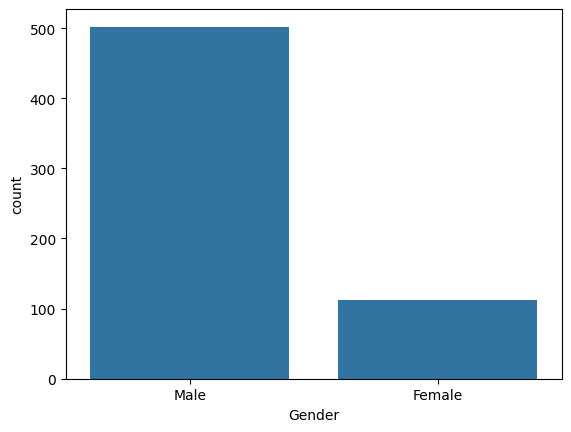

Axes(0.125,0.11;0.775x0.77)


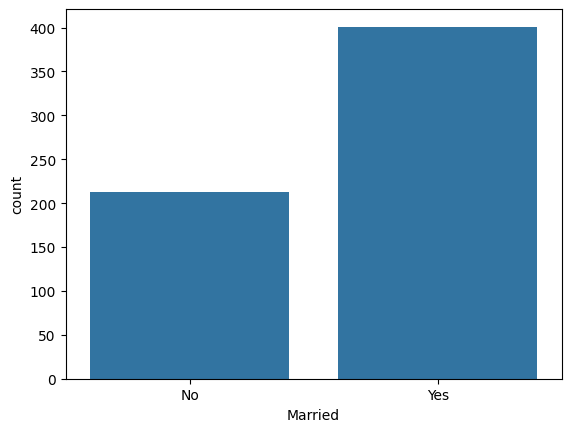

Axes(0.125,0.11;0.775x0.77)


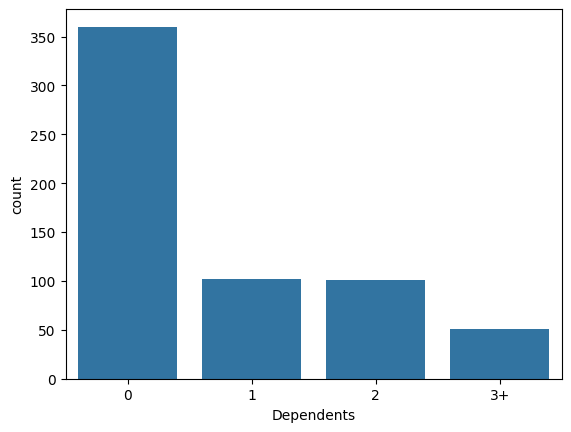

Axes(0.125,0.11;0.775x0.77)


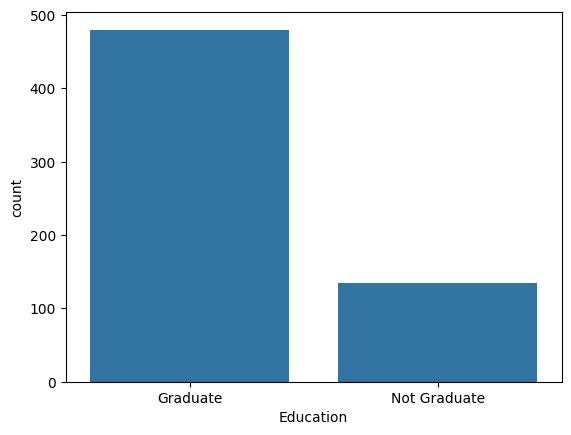

Axes(0.125,0.11;0.775x0.77)


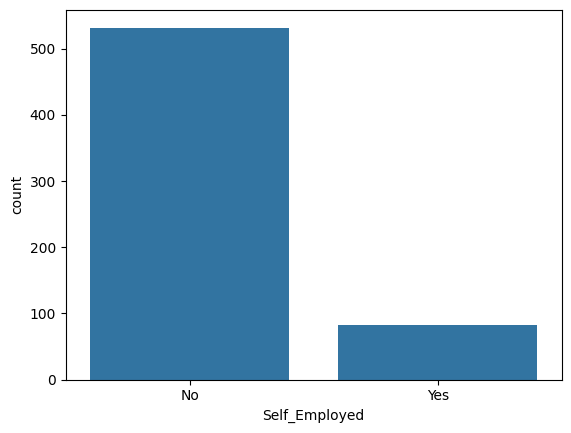

Axes(0.125,0.11;0.775x0.77)


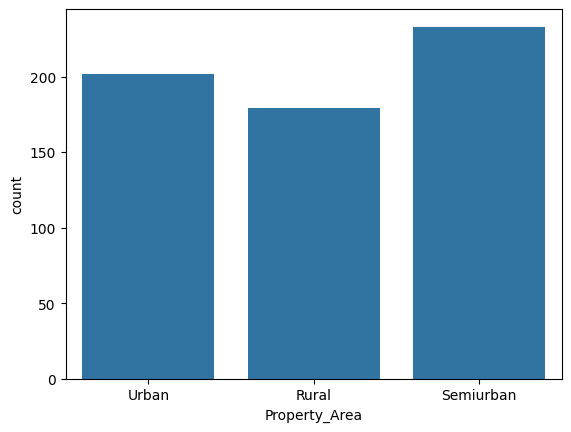

Axes(0.125,0.11;0.775x0.77)


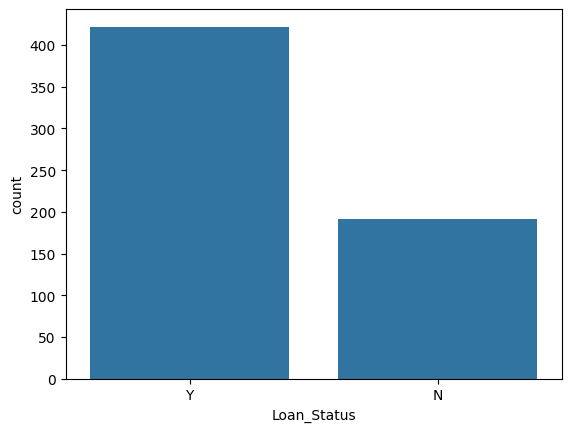

In [306]:
for i in cat_cols:
        print(sns.countplot(data = df, x = i))
        plt.show()

In [307]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()

In [308]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Axes(0.125,0.11;0.775x0.77)


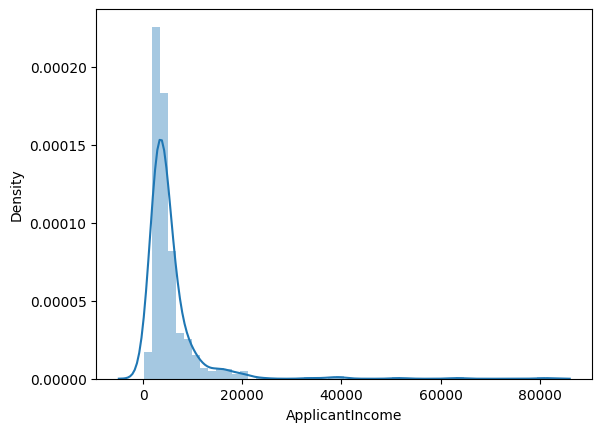

Axes(0.125,0.11;0.775x0.77)


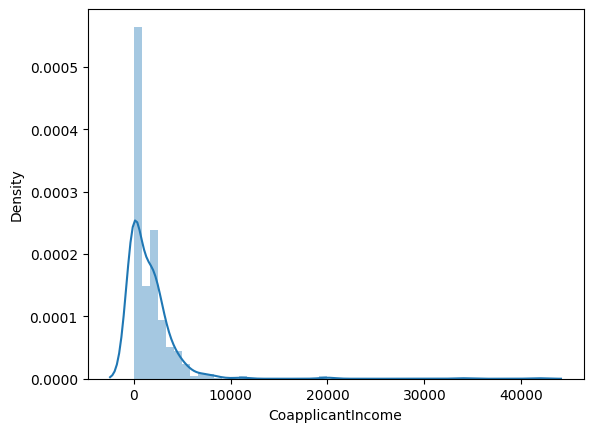

Axes(0.125,0.11;0.775x0.77)


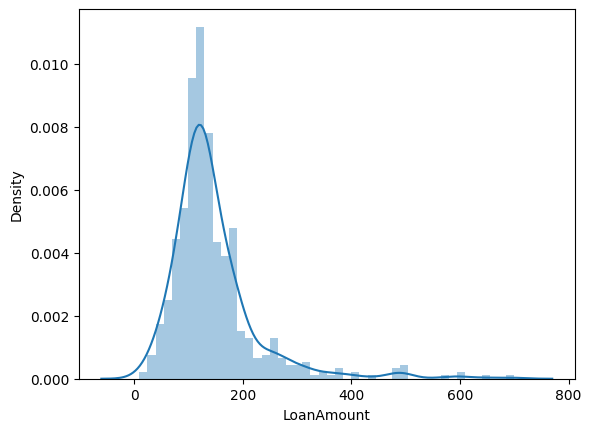

Axes(0.125,0.11;0.775x0.77)


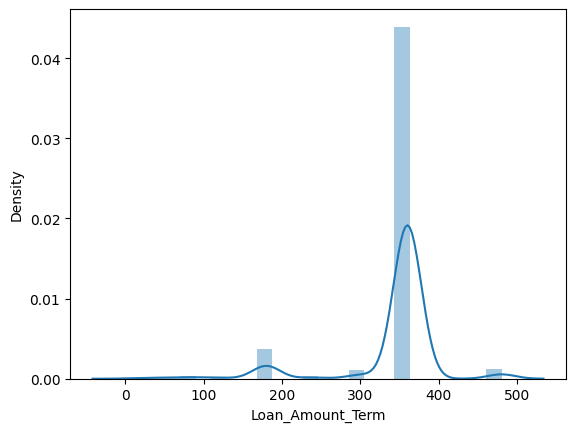

Axes(0.125,0.11;0.775x0.77)


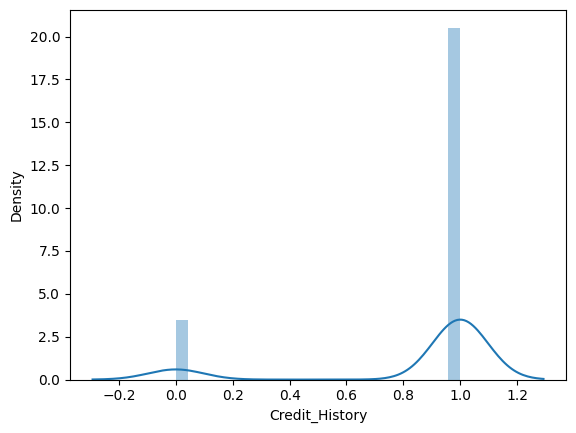

In [309]:
for i in num_cols:
    print(sns.distplot(df[i]))
    plt.show()

In [313]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('No of Unique features = ',df[i].nunique())
    print()

Gender
['Male' 'Female']
No of Unique features =  2

Married
['No' 'Yes']
No of Unique features =  2

Dependents
['0' '1' '2' '3+']
No of Unique features =  4

Education
['Graduate' 'Not Graduate']
No of Unique features =  2

Self_Employed
['No' 'Yes']
No of Unique features =  2

ApplicantIncome
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 201

In [314]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [318]:
for i in cat_cols:
    print(df[i].value_counts())
    print(f'No of unique values in {i} = {df[i].nunique()}')
    print(df.groupby(i)['Loan_Status'].value_counts(normalize=True) * 100)
    print('-----'*20)

Gender
Male      502
Female    112
Name: count, dtype: int64
No of unique values in Gender = 2
Gender  Loan_Status
Female  Y              66.964286
        N              33.035714
Male    Y              69.123506
        N              30.876494
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
Married
Yes    401
No     213
Name: count, dtype: int64
No of unique values in Married = 2
Married  Loan_Status
No       Y              62.910798
         N              37.089202
Yes      Y              71.820449
         N              28.179551
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
No of unique values in Dependents = 4
Dependents  Loan_Status
0           Y              68.611111
            N              31.388889
1           Y           

In [320]:
### Observations
# 1. delete self employed
# 2. replace 3+ with 3

In [322]:
df.drop(columns='Self_Employed', inplace=True)

In [324]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [326]:
cat_cols = [col for col in cat_cols if col in df.columns]

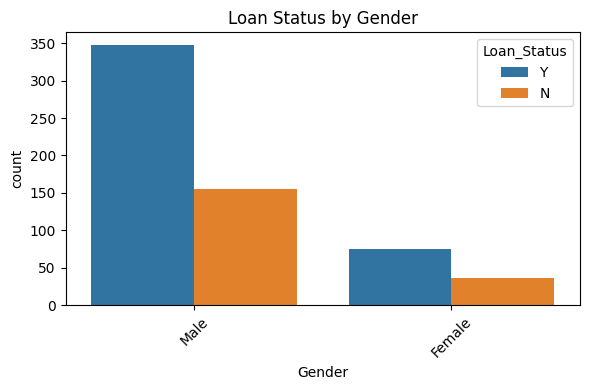

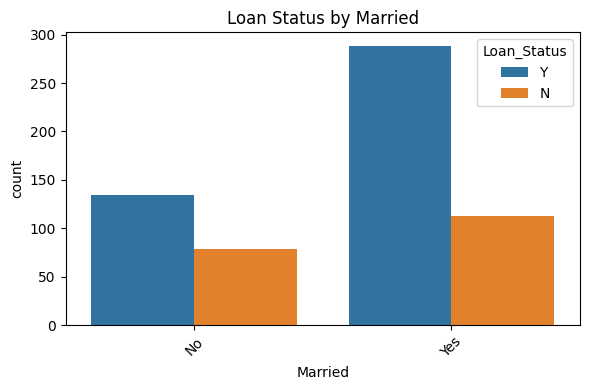

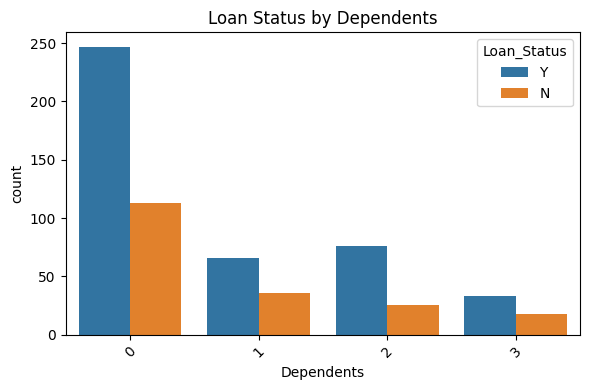

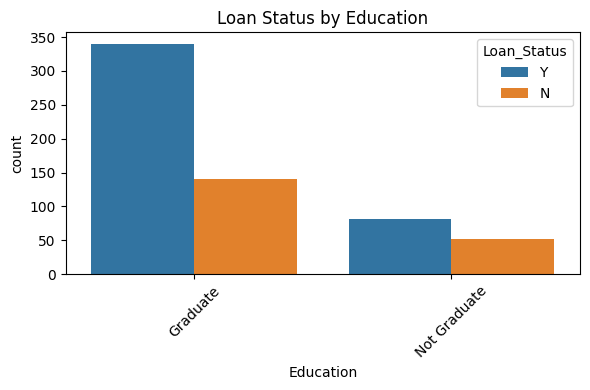

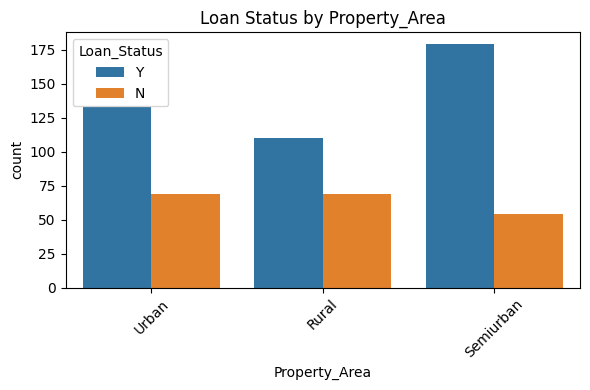

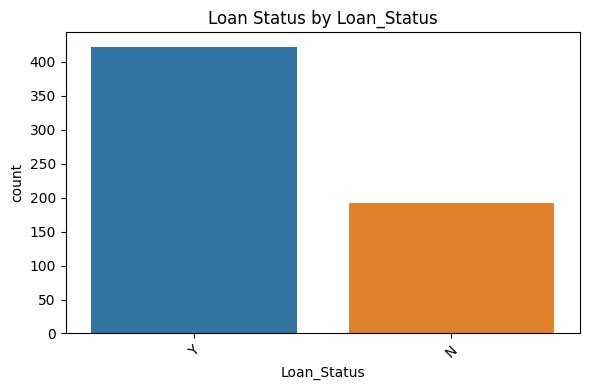

In [328]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f'Loan Status by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Removing outliers

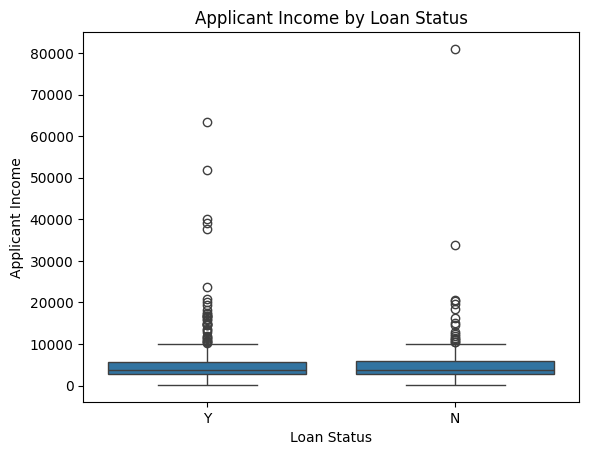

In [330]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

In [331]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

In [332]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [333]:
# Remove outliers
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

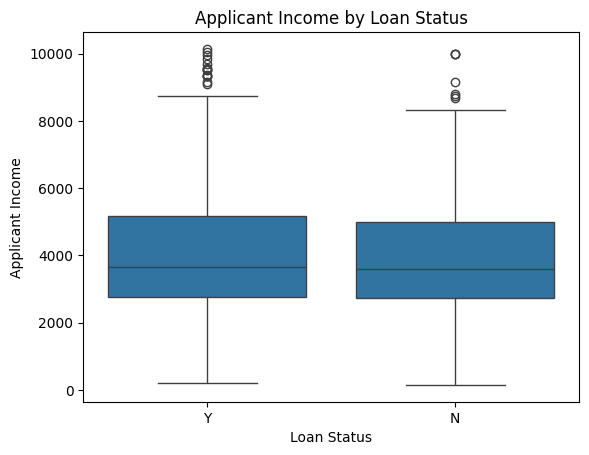

In [335]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

In [341]:
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

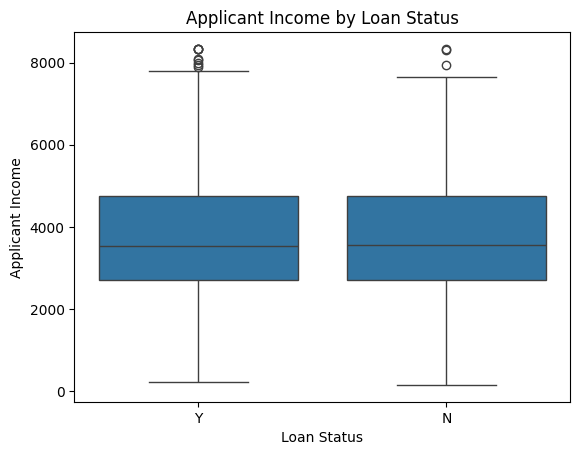

In [343]:
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

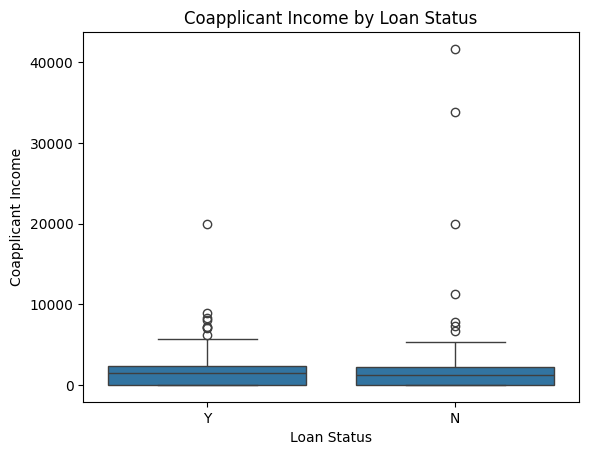

In [345]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('Coapplicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.show()

In [347]:
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

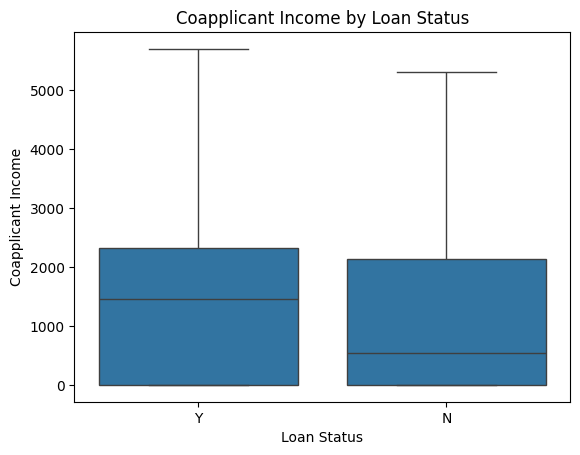

In [349]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)
plt.title('Coapplicant Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.show()

In [351]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

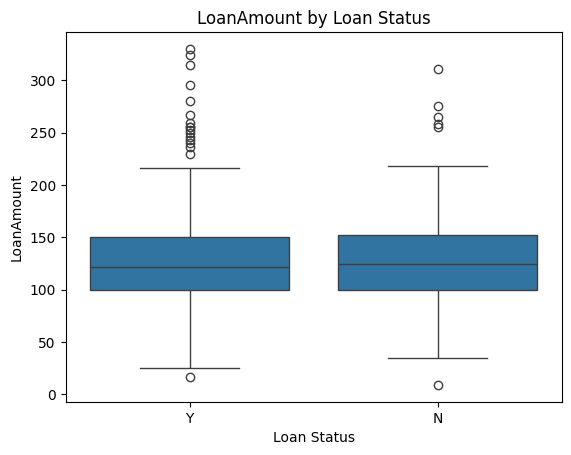

In [353]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('LoanAmount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('LoanAmount')
plt.show()

In [355]:
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

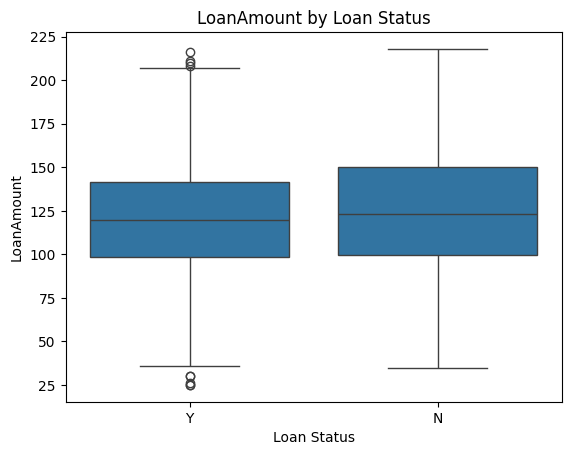

In [357]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('LoanAmount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('LoanAmount')
plt.show()

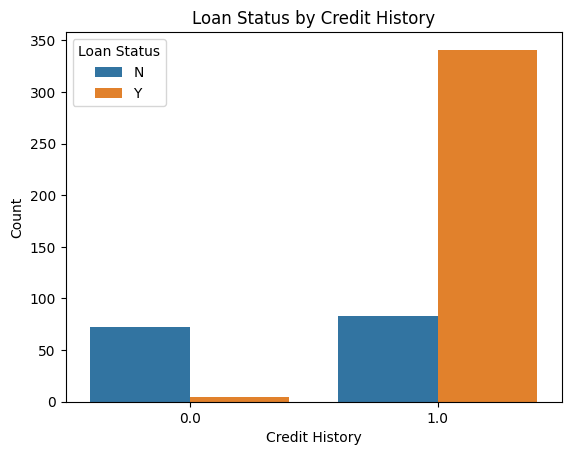

In [358]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [361]:
df.head()

Gender Married  Dependents     Education  ApplicantIncome  \
0   Male      No           0      Graduate             5849   
1   Male     Yes           1      Graduate             4583   
2   Male     Yes           0      Graduate             3000   
3   Male     Yes           0  Not Graduate             2583   
4   Male      No           0      Graduate             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

### Model building

In [368]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier

In [372]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [374]:
# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Property_Area'], drop_first=True)

In [376]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [380]:
model1=DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [382]:
# Predicting for training and testing 
ytrain_pred = model1.predict(X_train)
ytest_pred = model1.predict(X_test)

In [384]:
from sklearn.metrics import accuracy_score
# Calculate metrics
accuracy_train = accuracy_score(y_train, ytrain_pred)
accuracy_test = accuracy_score(y_test, ytest_pred)

print(f'Training Score {round(accuracy_train,2)}, Testing Score {round(accuracy_test,2)}')

Training Score 1.0, Testing Score 0.8


In [388]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, ytest_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ytest_pred))
print("Classification Report:\n", classification_report(y_test, ytest_pred))

Accuracy: 0.801980198019802
Confusion Matrix:
 [[20 11]
 [ 9 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67        31
           1       0.85      0.87      0.86        70

    accuracy                           0.80       101
   macro avg       0.77      0.76      0.76       101
weighted avg       0.80      0.80      0.80       101



In [390]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       276

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [392]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67        31
           1       0.85      0.87      0.86        70

    accuracy                           0.80       101
   macro avg       0.77      0.76      0.76       101
weighted avg       0.80      0.80      0.80       101

